     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 6.3 MB/s eta 0:00:00


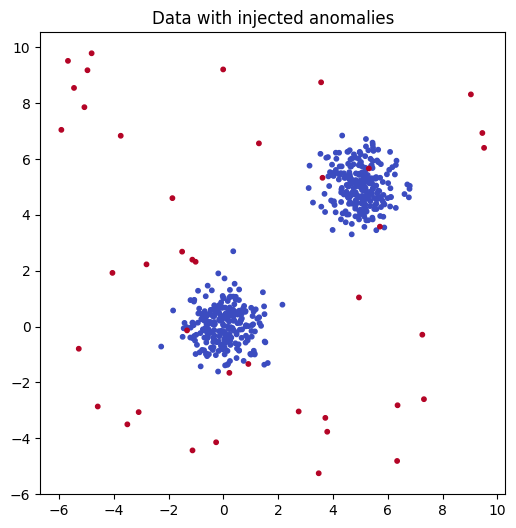

ROC-AUC for anomaly detection: 0.024
Average precision: 0.039


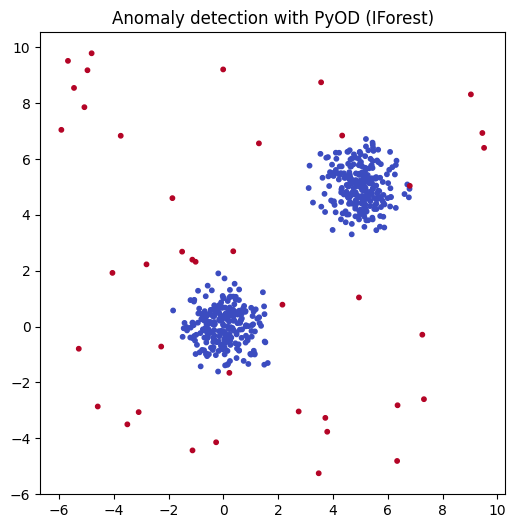

In [1]:
# ==== Cell 1: Install ====
!pip install pyod scikit-learn

# ==== Cell 2: Imports ====
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyod.models.iforest import IForest
from sklearn.metrics import roc_auc_score, average_precision_score

plt.rcParams["figure.figsize"] = (6, 6)

# ==== Cell 3: Create synthetic data with anomalies ====
X, y = make_blobs(
    n_samples=500, centers=[[0, 0], [5, 5]], cluster_std=[0.7, 0.7], random_state=42
)

rng = np.random.RandomState(42)
n_outliers = 40
outliers = rng.uniform(low=-6, high=10, size=(n_outliers, 2))

X_data = np.vstack([X, outliers])
y_true = np.hstack([np.zeros(len(X)), np.ones(n_outliers)])  # 1 = anomaly

plt.scatter(X_data[:, 0], X_data[:, 1], s=10, c=y_true, cmap="coolwarm")
plt.title("Data with injected anomalies")
plt.show()

# ==== Cell 4: Train Isolation Forest via PyOD ====
clf = IForest(random_state=42, contamination=n_outliers / len(X_data))
clf.fit(X_data)

# PyOD: 1 = outlier, 0 = inlier
y_pred = clf.labels_
scores = clf.decision_scores_ * -1  # higher = more anomalous

roc  = roc_auc_score(y_true, scores)
ap   = average_precision_score(y_true, scores)

print(f"ROC-AUC for anomaly detection: {roc:.3f}")
print(f"Average precision: {ap:.3f}")

# ==== Cell 5: Visualize anomalies ====
plt.scatter(X_data[:, 0], X_data[:, 1], s=10, c=y_pred, cmap="coolwarm")
plt.title("Anomaly detection with PyOD (IForest)")
plt.show()
